In [3]:
import numpy as np 
import pandas as pd 

# Feature Scaling
from sklearn.preprocessing import RobustScaler

# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier (machine learning algorithm) 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Settings
pd.options.mode.chained_assignment = None # Stop warning when use inplace=True of fillna

In [13]:
train_set =  pd.read_csv('train.csv')
test_set =  pd.read_csv('test.csv')

In [14]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()
    # WARNING: This will leave Counts column in dataset if you continues to use this dataset

# Categorical/Ordinal Data Plot
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

    
survival_palette = {0: "black", 1: "orange"} # Color map for visualization

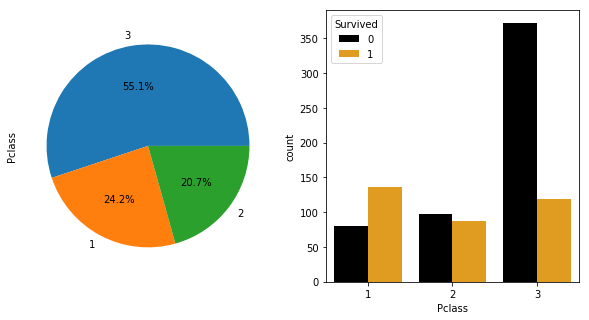

In [19]:
cat_plot(train_set, 'Pclass','Survived', survival_palette)

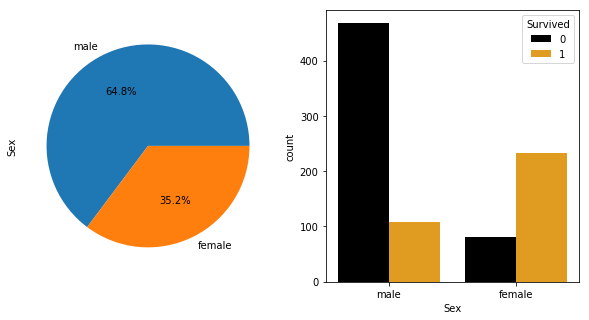

In [20]:
cat_plot(train_set, 'Sex','Survived', survival_palette)

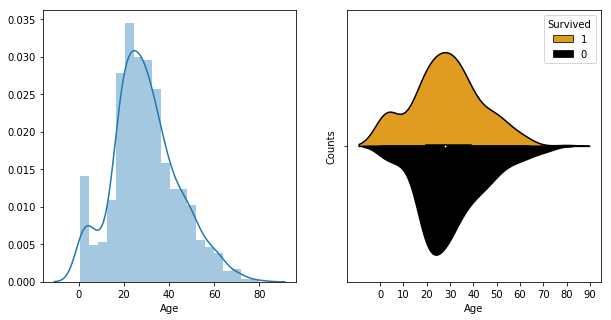

In [21]:
age_set_nonan = train_set[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))

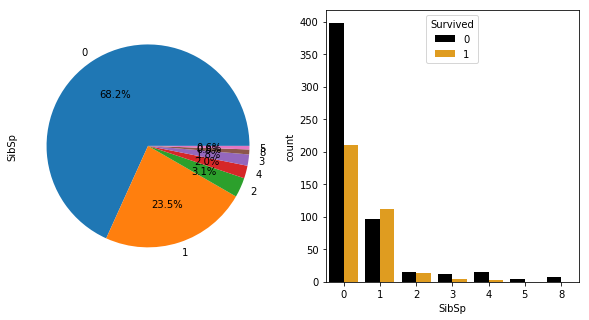

In [22]:
cat_plot(train_set, 'SibSp', 'Survived', survival_palette)

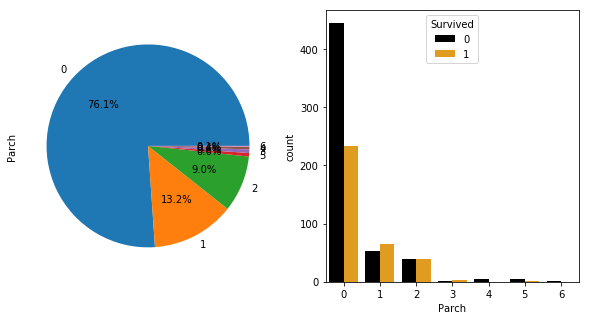

In [23]:
cat_plot(train_set, 'Parch', 'Survived', survival_palette)

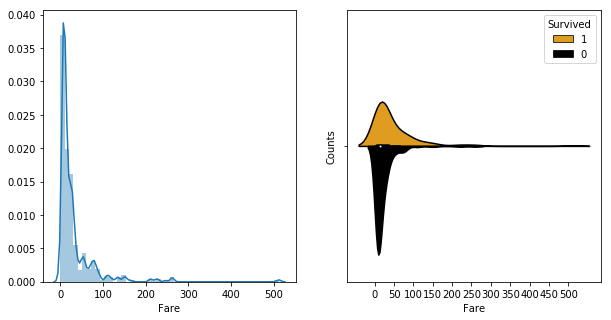

In [24]:
fare_set = train_set[['Fare','Survived']].copy() # Copy dataframe so method won't leave Counts column in train_set
cont_plot(fare_set, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))

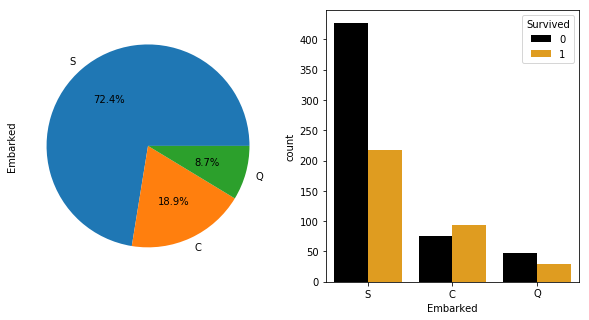

In [25]:
emb_set_nonan = train_set[['Embarked','Survived']].copy().dropna(axis=0)
cat_plot(train_set, 'Embarked','Survived', survival_palette)

In [27]:
train_set["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
combined_set = [train_set, test_set] # combined 2 datasets for more efficient processing

for dataset in combined_set:
    dataset["Age"].fillna(dataset["Age"].median(), inplace=True)
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace=True)

train_set["Embarked"].fillna(train_set["Embarked"].value_counts().index[0], inplace=True)

In [29]:
age_bins = [0,15,35,45,60,200]
age_labels = ['15-','15-35','35-45','40-60','60+']
fare_bins = [0,10,30,60,999999]
fare_labels = ['10-','10-30','30-60','60+']

def get_title(dataset, feature_name):
    return dataset[feature_name].map(lambda name:name.split(',')[1].split('.')[0].strip())

for dataset in combined_set:
    dataset['AgeRange'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
    dataset['FareRange'] = pd.cut(dataset['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
    dataset['FamilySize'] = dataset['SibSp'] + train_set['Parch']
    dataset['HasCabin'] = dataset['Cabin'].notnull().astype(int) # NaN Cabins will become 0, otherwise 1
    dataset['Title'] = get_title(dataset, 'Name')


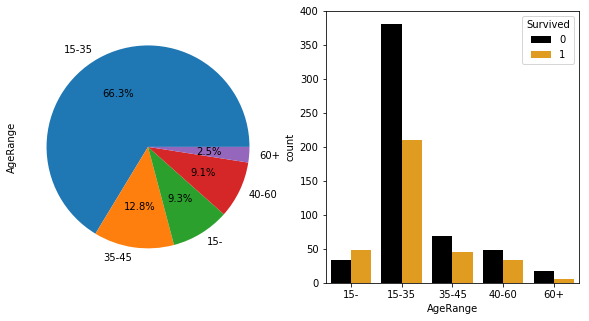

In [30]:
cat_plot(train_set, 'AgeRange','Survived', survival_palette)

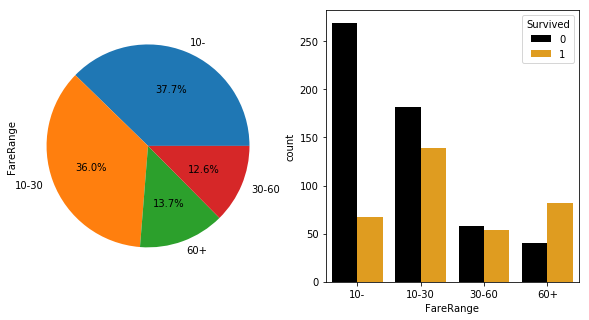

In [31]:
cat_plot(train_set, 'FareRange','Survived', survival_palette)

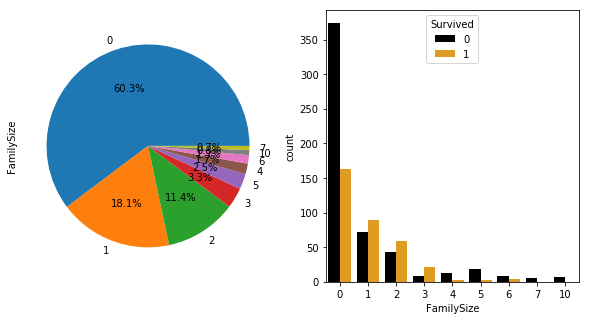

In [32]:
cat_plot(train_set, 'FamilySize','Survived', survival_palette)


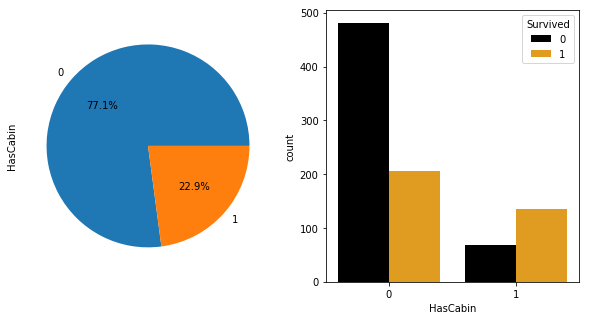

In [33]:
cat_plot(train_set, 'HasCabin','Survived', survival_palette)

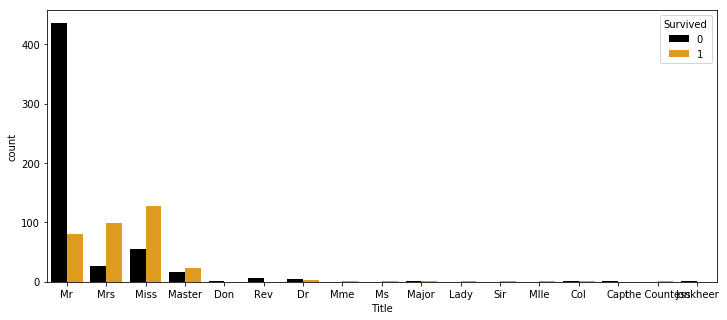

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Mme               1
Ms                1
Sir               1
Lady              1
Jonkheer          1
the Countess      1
Don               1
Name: Title, dtype: int64


In [34]:
fig, axis = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='Title', hue='Survived', data=train_set,
                  palette=survival_palette,ax=axis)
plt.show()

print(train_set['Title'].value_counts())

In [35]:
for dataset in combined_set:
    dataset['Family'] = ''
    dataset.loc[dataset['FamilySize'] == 0, 'Family'] = 'alone'
    dataset.loc[(dataset['FamilySize'] > 0) & (dataset['FamilySize'] <= 3), 'Family'] = 'small'
    dataset.loc[(dataset['FamilySize'] > 3) & (dataset['FamilySize'] <= 6), 'Family'] = 'medium'
    dataset.loc[dataset['FamilySize'] > 6, 'Family'] = 'large'

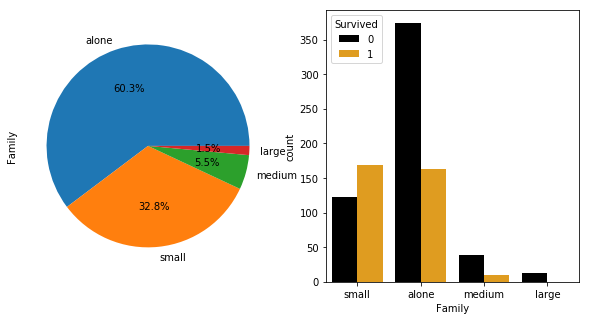

In [36]:
cat_plot(train_set, 'Family','Survived', survival_palette)


In [37]:
title_dict = {
                "Mr" :        "Mr",
                "Miss" :      "Miss",
                "Mrs" :       "Mrs",
                "Master" :    "Master",
                "Dr":         "Scholar",
                "Rev":        "Religious",
                "Col":        "Officer",
                "Major":      "Officer",
                "Mlle":       "Miss",
                "Don":        "Noble",
                "the Countess":"Noble",
                "Ms":         "Mrs",
                "Mme":        "Mrs",
                "Capt":       "Noble",
                "Lady" :      "Noble",
                "Sir" :       "Noble",
                "Jonkheer":   "Noble"
            }

for dataset in combined_set:
    dataset['TitleGroup'] = dataset.Title.map(title_dict)

In [38]:
print(test_set[test_set['TitleGroup'].isnull() == True])

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   

     Parch    Ticket   Fare Cabin Embarked AgeRange FareRange  FamilySize  \
414      0  PC 17758  108.9  C105        C    35-45       60+         0.0   

     HasCabin Title Family TitleGroup  
414         1  Dona  alone        NaN  


In [39]:
test_set.at[414, 'TitleGroup'] = 'Noble' # A record with Dona title

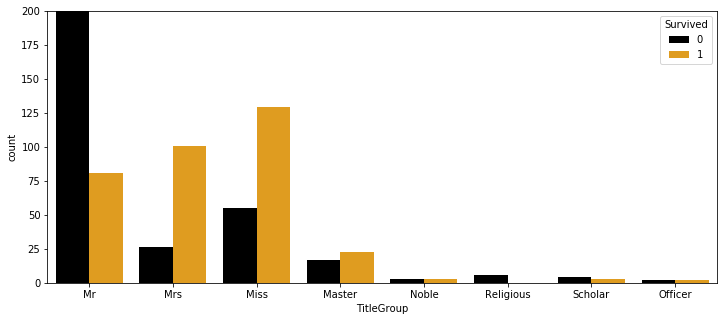

In [40]:
fig, axis = plt.subplots(1,1,figsize=(12,5))
sns.countplot(x='TitleGroup', hue='Survived', data=train_set,
              palette=survival_palette,ax=axis)
axis.set_ylim(0, 200)
plt.show()

In [41]:
X_train = train_set.drop(['Survived','PassengerId','Name','Age','Fare','Ticket','Cabin','SibSp','Parch','Title','FamilySize'], axis=1)
X_test = test_set.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin','SibSp','Parch','Title','FamilySize'], axis=1)

y_train = train_set['Survived']  # Relocate Survived target feature to y_train

In [42]:
X_train_analysis = X_train.copy()
X_train_analysis['Sex'] = X_train_analysis['Sex'].map({'male': 0, 'female': 1}).astype(int)
X_train_analysis['Embarked'] = X_train_analysis['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
X_train_analysis['Family'] = X_train_analysis['Family'].map({'alone': 0, 'small': 1, 'medium': 2, 'large': 3}).astype(int)

agerange_dict = dict(zip(age_labels, list(range(len(age_labels)))))
X_train_analysis['AgeRange'] = X_train_analysis['AgeRange'].map(agerange_dict).astype(int)

farerange_dict = dict(zip(fare_labels, list(range(len(fare_labels)))))
X_train_analysis['FareRange'] = X_train_analysis['FareRange'].map(farerange_dict).astype(int)

titlegroup_labels = list(set(title_dict.values()))
titlegroup_dict = dict(zip(titlegroup_labels, list(range(len(titlegroup_labels)))))
X_train_analysis['TitleGroup'] = X_train_analysis['TitleGroup'].map(titlegroup_dict).astype(int)

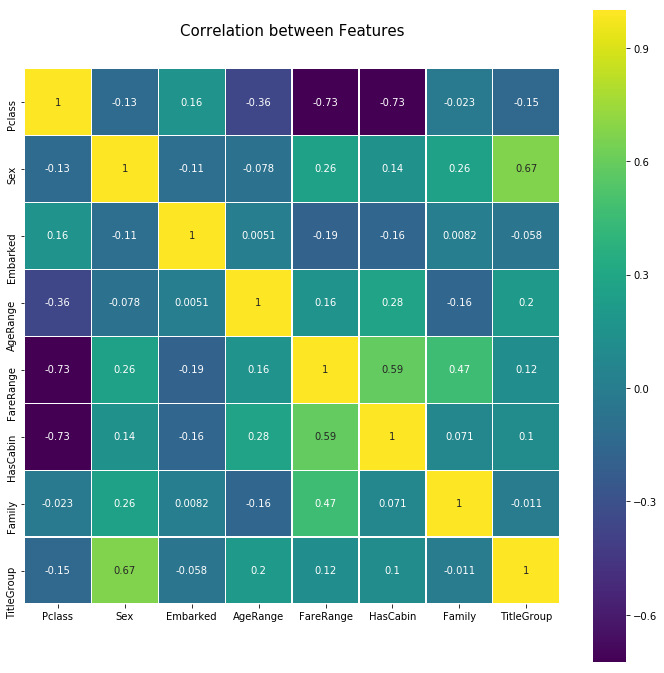

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(X_train_analysis.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [45]:
rforest_checker = RandomForestClassifier(random_state = 0)
rforest_checker.fit(X_train_analysis, y_train)
importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],
                              index=X_train_analysis.columns)
importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(importances_df)

            Feature_Importance
TitleGroup            0.342309
Sex                   0.127164
Family                0.106878
Pclass                0.103355
AgeRange              0.101166
FareRange             0.086920
HasCabin              0.070759
Embarked              0.061451


/Users/vessilli/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


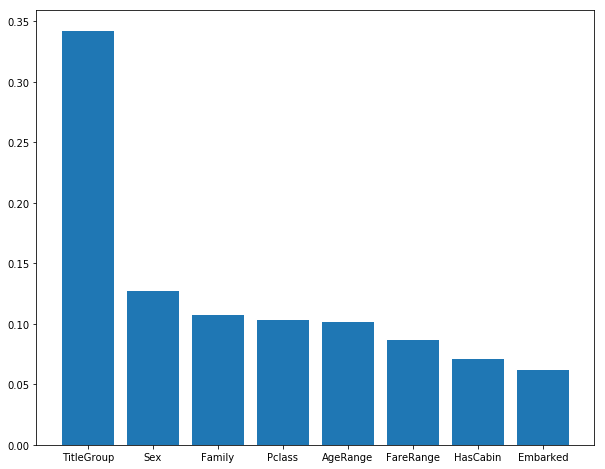

In [52]:
plt.figure(figsize=(10,8))
plt.bar(importances_df.index,importances_df.Feature_Importance)
plt.show()